In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/content/Supermarket.csv")

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data = data.drop(['Branch','City','Invoice ID'], axis=1)
data.head(5)

,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.isna().sum()

Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax                        0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [ ]:
data['Customer type'].value_counts()


Member    501
Normal    499
Name: Customer type, dtype: int64

In [ ]:
data.dtypes

Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax                        float64
Total                      float64
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df=data.copy()

In [ ]:
cols = df.select_dtypes('object').columns

In [ ]:
df[cols]= df[cols].apply(le.fit_transform)

In [ ]:
df.head()

,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3


## K Means

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

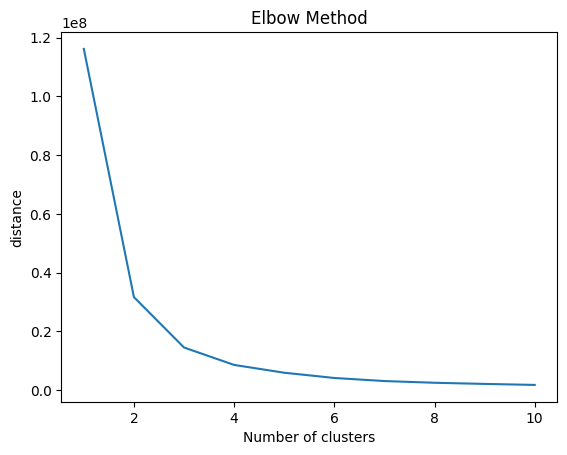

In [ ]:
means = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(df)
    means.append(kmeans.inertia_)
plt.plot(range(1, 11), means)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distance')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=0)
kmeans.fit(df)
label = kmeans.labels_


In [ ]:
k_Data = pd.concat([df, pd.DataFrame({'Cluster': list(label)})], axis=1)
k_Data

,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
0,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,2
1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,0
2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,2
3,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,2
4,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2,0
996,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4,1
997,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7,0
998,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1,0


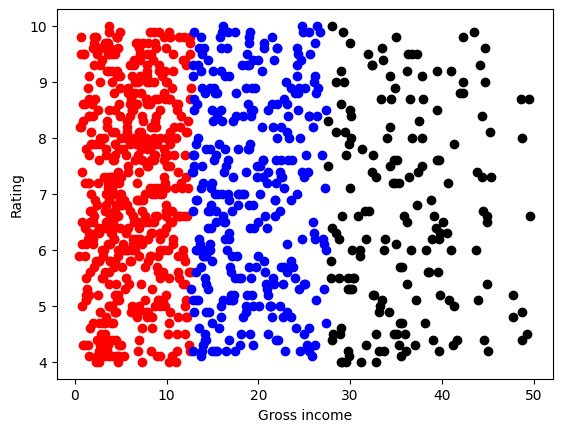

In [ ]:
label_0 = k_Data[label == 0]
label_1 = k_Data[label == 1]
label_2 = k_Data[label == 2]
cols = df.columns
 
plt.xlabel("Gross income")
plt.ylabel("Rating")
plt.scatter(label_0[cols[10]], label_0[cols[11]], color = 'red')
plt.scatter(label_1[cols[10]], label_1[cols[11]], color = 'black')
plt.scatter(label_2[cols[10]], label_2[cols[11]], color = 'blue')
plt.show()

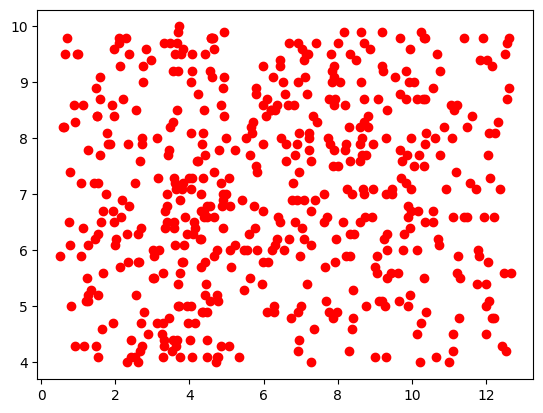

In [ ]:
plt.scatter(label_0[cols[10]], label_0[cols[11]], color = 'red')

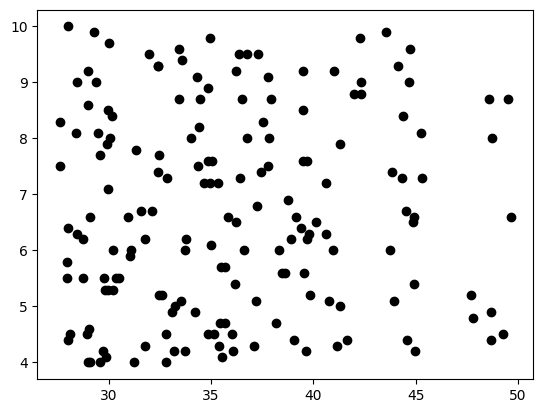

In [ ]:
plt.scatter(label_1[cols[10]], label_1[cols[11]], color = 'black')

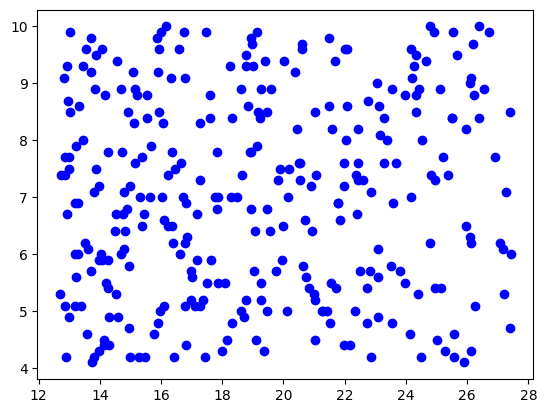

In [ ]:
plt.scatter(label_2[cols[10]], label_2[cols[11]], color = 'blue')

In [ ]:
k_Data.dtypes

Customer type                int64
Gender                       int64
Product line                 int64
Unit price                 float64
Quantity                     int64
Tax                        float64
Total                      float64
Payment                      int64
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Cluster                      int32
dtype: object

In [ ]:
cluster_data= pd.concat([data, pd.DataFrame({'label': list(label)})], axis=1)
cluster_data.dtypes

Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax                        float64
Total                      float64
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
label                        int32
dtype: object

In [ ]:
cluster_data.head()

,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating,label
0,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2
1,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,0
2,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2
3,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2
4,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,1


In [ ]:
cluster_data[label == 0].select_dtypes('object').describe()

,Customer type,Gender,Product line,Payment
count,517,517,517,517
unique,2,2,6,3
top,Normal,Male,Fashion accessories,Ewallet
freq,266,271,95,177


In [ ]:
cluster_data[label == 0].describe()

,Unit price,Quantity,Tax,Total,cogs,gross margin percentage,gross income,Rating,label
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0
mean,41.758878,3.843327,6.290904,132.108989,125.818085,4.761905,6.290904,7.031721,0.0
std,24.405310,2.585855,3.269976,68.669498,65.399522,0.000000,3.269976,1.687390,0.0
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,0.0
25%,21.870000,2.000000,3.655000,76.755000,73.100000,4.761905,3.655000,5.800000,0.0
50%,35.470000,3.000000,6.096000,128.016000,121.920000,4.761905,6.096000,7.000000,0.0
75%,57.740000,5.000000,8.952500,188.002500,179.050000,4.761905,8.952500,8.500000,0.0
max,99.890000,10.000000,12.668000,266.028000,253.360000,4.761905,12.668000,10.000000,0.0


In [ ]:
cluster_data[label==0]['Product line'].value_counts()

Fashion accessories       95
Electronic accessories    94
Food and beverages        90
Home and lifestyle        83
Sports and travel         82
Health and beauty         73
Name: Product line, dtype: int64

In [ ]:
cluster_data[label==0]['Payment'].value_counts()

Ewallet        177
Cash           175
Credit card    165
Name: Payment, dtype: int64

Cluster 1:

517 from 1,000 supermarket transactions were categorized into cluster 1.

Customers of this group are 52.4% male, and 51.4% of all customers are not member of this supermarket.

The customers mostly bought fashion accessories, Electronic accessories and Food and beverages products, respectively, and paid for the product via Ewallet and cash.

The average supermarket rating provided by this group is 7.03 (with max=10 and min=4).

This supermarket gains average gross income from customer of this group about 6.29

In [ ]:
cluster_data[label == 1].select_dtypes('object').describe()

,Customer type,Gender,Product line,Payment
count,171,171,171,171
unique,2,2,6,3
top,Member,Female,Electronic accessories,Cash
freq,88,88,31,60


In [ ]:
cluster_data[label == 1].describe()

,Unit price,Quantity,Tax,Total,cogs,gross margin percentage,gross income,Rating,label
count,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.0
mean,84.106023,8.660819,36.074325,757.560816,721.486491,4.761905e+00,36.074325,6.697661,1.0
std,11.605703,1.284128,5.746890,120.684680,114.937790,8.907869e-16,5.746890,1.780018,0.0
min,55.870000,6.000000,27.611500,579.841500,552.230000,4.761905e+00,27.611500,4.000000,1.0
25%,75.215000,8.000000,31.153250,654.218250,623.065000,4.761905e+00,31.153250,5.150000,1.0
50%,85.600000,9.000000,35.372000,742.812000,707.440000,4.761905e+00,35.372000,6.600000,1.0
75%,94.480000,10.000000,39.703750,833.778750,794.075000,4.761905e+00,39.703750,8.150000,1.0
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000,1.0


In [ ]:
cluster_data[label==1]['Product line'].value_counts()

Electronic accessories    31
Sports and travel         30
Home and lifestyle        30
Fashion accessories       28
Health and beauty         27
Food and beverages        25
Name: Product line, dtype: int64

In [ ]:
cluster_data[label==1]['Payment'].value_counts()


Cash           60
Credit card    58
Ewallet        53
Name: Payment, dtype: int64

Cluster 2:

171 from 1,000 supermarket transactions were categorized into cluster 2

Customers of this group are mostly female 51.4%, and 51.4% of all customers are member of this supermarket.

The customers mostly bought Electronic accessories, Home and lifestyle and Sports and travel products and they paid for the product via Cash and Credit card.

The average supermarket rating provided by this group is 6.6 (with max=10 and min=4).

This supermarket gains average gross income from customer of this group about 36.07 $

In [ ]:
cluster_data[label == 2].select_dtypes('object').describe()

,Customer type,Gender,Product line,Payment
count,312,312,312,312
unique,2,2,6,3
top,Member,Female,Food and beverages,Ewallet
freq,162,167,59,115


In [ ]:
cluster_data[label == 2].describe()

,Unit price,Quantity,Tax,Total,cogs,gross margin percentage,gross income,Rating,label
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0
mean,63.143141,6.544872,19.096994,401.036865,381.939872,4.761905,19.096994,7.025641,2.0
std,19.252955,2.075250,4.233933,88.912603,84.678669,0.000000,4.233933,1.726579,0.0
min,25.900000,3.000000,12.697500,266.647500,253.950000,4.761905,12.697500,4.100000,2.0
25%,47.905000,5.000000,15.314625,321.607125,306.292500,4.761905,15.314625,5.500000,2.0
50%,62.040000,6.000000,18.883500,396.553500,377.670000,4.761905,18.883500,7.000000,2.0
75%,77.132500,8.000000,22.515250,472.820250,450.305000,4.761905,22.515250,8.500000,2.0
max,99.780000,10.000000,27.427500,575.977500,548.550000,4.761905,27.427500,10.000000,2.0


In [ ]:
cluster_data[label == 2]['Product line'].value_counts()

Food and beverages        59
Fashion accessories       55
Sports and travel         54
Health and beauty         52
Home and lifestyle        47
Electronic accessories    45
Name: Product line, dtype: int64

In [ ]:
cluster_data[label == 2]['Payment'].value_counts()


Ewallet        115
Cash           109
Credit card     88
Name: Payment, dtype: int64

Cluster 3:

312 from 1,000 supermarket transactions were categorized into cluster 3

Customers of this group are mostly female (53.5%), and 51.9% of all customers are member of this supermarket.

The customers mostly bought Food and beverages, Fashion accessories and Sports and travel products and they paid for the product via Ewallet and Cash.

The average supermarket rating provided by this group is 7.02 (with max=10 and min=4).

This supermarket gains average gross income from customer of this group about 19.09 $

**Final** **conclusion**

The result shows that member customers tend to paid for products more that non-member customers. This supermarket gain the maximum gross income from cluster-2 with Electronic accessories (31 transaction), Home and lifestyle (30 transaction), and Sports and travel (30 transaction) product. This means that this supermarket should focus on those three product lines which might help supermarket increase sales.

## Market basket analysis

In [ ]:
ndata=pd.read_csv("/content/Supermarket.csv")

In [ ]:
ndata.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
ndata['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
def gen_data(ci,ds,cc):
  df=ds[ds['City']==ci]
  import random
  randomlist = []
  for i in range(0,cc):
    n = random.randint(1,60)
    randomlist.append(n)
  df['Invoice ID']=randomlist
  return df
  

In [ ]:
d1=gen_data("Yangon",ndata,340)

<ipython-input-42-308072605197>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice ID']=randomlist


In [ ]:
d1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,36,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
2,16,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,12,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,58,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
6,8,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,35,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,Credit card,282.80,4.761905,14.1400,4.5
992,7,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,Ewallet,116.06,4.761905,5.8030,8.8
997,1,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,9,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
d2=gen_data("Mandalay",ndata,332)

<ipython-input-42-308072605197>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice ID']=randomlist


In [ ]:
d3=gen_data("Naypyitaw",ndata,328)

<ipython-input-42-308072605197>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice ID']=randomlist


## APPRIORI Algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
def apalgo(br,ds):
  df=ds
  basket=(df[df['Branch'] ==br].pivot_table(index="Invoice ID", columns="Product line", values="Quantity", aggfunc="sum",fill_value=0) )
  
  def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

  basket_sets = basket.applymap(encode_units)

  frequent_itemsets = apriori(basket_sets, min_support=0.3, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
  return rules[rules["lift"]>1]




In [ ]:
fin1=apalgo("A",d1)

In [ ]:
fin2=apalgo("B",d2)

In [ ]:
fin3=apalgo("C",d3)

In [ ]:
fin1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fashion accessories),(Food and beverages),0.583333,0.633333,0.416667,0.714286,1.127820,0.047222,1.283333
1,(Food and beverages),(Fashion accessories),0.633333,0.583333,0.416667,0.657895,1.127820,0.047222,1.217949
2,(Health and beauty),(Fashion accessories),0.533333,0.583333,0.316667,0.593750,1.017857,0.005556,1.025641
3,(Fashion accessories),(Health and beauty),0.583333,0.533333,0.316667,0.542857,1.017857,0.005556,1.020833
4,(Home and lifestyle),(Fashion accessories),0.683333,0.583333,0.416667,0.609756,1.045296,0.018056,1.067708
5,(Fashion accessories),(Home and lifestyle),0.583333,0.683333,0.416667,0.714286,1.045296,0.018056,1.108333
6,(Sports and travel),(Fashion accessories),0.566667,0.583333,0.400000,0.705882,1.210084,0.069444,1.416667
7,(Fashion accessories),(Sports and travel),0.583333,0.566667,0.400000,0.685714,1.210084,0.069444,1.378788
8,(Health and beauty),(Food and beverages),0.533333,0.633333,0.366667,0.687500,1.085526,0.028889,1.173333
9,(Food and beverages),(Health and beauty),0.633333,0.533333,0.366667,0.578947,1.085526,0.028889,1.108333


RESULT

In [ ]:
fin1[(fin1["support"]>0.4) & (fin1["confidence"]>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fashion accessories),(Food and beverages),0.583333,0.633333,0.416667,0.714286,1.127820,0.047222,1.283333
5,(Fashion accessories),(Home and lifestyle),0.583333,0.683333,0.416667,0.714286,1.045296,0.018056,1.108333
12,(Sports and travel),(Food and beverages),0.566667,0.633333,0.416667,0.735294,1.160991,0.057778,1.385185


In city Yangon, customers purchasing sports and travel products will also purchase food and beverages products.

In [ ]:
fin2[(fin2["support"]>0.4) & (fin2["confidence"]>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Health and beauty),(Food and beverages),0.616667,0.600000,0.466667,0.756757,1.261261,0.096667,1.644444
13,(Food and beverages),(Health and beauty),0.600000,0.616667,0.466667,0.777778,1.261261,0.096667,1.725000


In city Mandalay, customers purchasing food and beverages will also purchase health and beauty products.

In [ ]:
fin3[fin3["support"]>0.4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Electronic accessories),(Food and beverages),0.644068,0.677966,0.491525,0.763158,1.125658,0.054869,1.359699
1,(Food and beverages),(Electronic accessories),0.677966,0.644068,0.491525,0.725000,1.125658,0.054869,1.294299


In city Napyitaw, customers purchasing electronic accessories will also purchase food and beverages

Together, these measures indicate that the itemset in question is relatively common in the dataset, as it appears in 40% of transactions. Additionally, the rule has a relatively high confidence of 0.7, which indicates that when the antecedent is present, there is a 70% chance that the consequent will also be present. However, it is important to note that the support and confidence values alone do not provide a complete picture of the association between the items, and further analysis may be required to fully understand the relationship between the items.

FOR LIFT:
A lift value of near 1 indicates that the probability of the antecedent (the item(s) on the left-hand side of the rule) and the consequent (the item(s) on the right-hand side of the rule) occurring together is slightly higher than if they were independent. This suggests a slightly positive association between the antecedent and the consequent, but the strength of the association is not very high.

FOR LEVERAGE:
Leverage measures the difference between the observed frequency of the antecedent and consequent occurring together and the frequency that would be expected if they were independent. A leverage value of near 0.05 suggests a small positive relationship between the antecedent and the consequent, but again, the strength of the relationship is not very strong.

FOR CONVICTION:
Conviction measures the degree of dependence between the antecedent and consequent, taking into account how often the consequent occurs regardless of the antecedent. A conviction value near 1 suggests that the consequent is about 1.3-1.5 times more likely to occur when the antecedent is present than when it is not present. This suggests a moderately positive association between the antecedent and the consequent.

From the above conclusion we can decide that due to less data and product's category is constrained to 6 we get an analysis which states the fact that the users buying products are almost independent and maximum dont have any behaviour